In [424]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
employment_2019 = pd.read_csv('dataset/Punesimi-2019.csv')
employment_2020 = pd.read_csv('dataset/Punesimi-2020.csv')
employment_2021 = pd.read_csv('dataset/Punesimi-2021.csv')
employment_2022 = pd.read_csv('dataset/Punesimi-2022.csv')
employment_2023 = pd.read_csv('dataset/Punesimi-2023.csv')


In [425]:
# Combine the datasets
employment_combined = pd.concat([employment_2019, employment_2020, employment_2021, employment_2022, employment_2023], ignore_index=True)
employment_combined.drop('Unnamed: 3', axis=1, inplace=True)

In [426]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

employment_combined.head(5)
employment_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 27 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [427]:
# Translate column names to English
employment_combined['M(15-65+)'] = employment_combined[['M 15-24', 'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M 65+']].sum(axis=1)
employment_combined['F(15-65+)'] = employment_combined[['F 15-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F 65+']].sum(axis=1)
employment_combined['M+F']=employment_combined['M(15-65+)'] + employment_combined['F(15-65+)']
employment_combined['MonthYearISO'] =  employment_combined['Muaji \nMesec\nMonth'].astype(str) + '-' +employment_combined['Viti Godina Year'].astype(str).str.pad(width=2, fillchar='0')

print(employment_combined.head())

column_translations = {
    'Viti Godina Year': 'Year',
    'Muaji \nMesec\nMonth': 'Month',
    'MonthYearISO': 'Month-Year',
    'PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION': 'Sector Description',
    'Statusi i regjistrimit \nStatus registracije Registration status': 'Registration Status',
    'Komuna Opstina Municipality': 'Municipality',
    'M+F': 'Number of Employees',
    'M(15-65+)': 'Men',
    'F(15-65+)': 'Women',
    'Mesat. Meshk \nProsecni M.\nAverage M.': 'Average Wage Men',
    'Mesat. Fem.\nProsecni F. Average F.': 'Average Wage Women'
}
employment_translated = employment_combined.rename(columns=column_translations).loc[:, list(column_translations.values())]

employment_translated.head(5)

   Viti Godina Year  Muaji \nMesec\nMonth  \
0              2019                     1   
1              2019                     1   
2              2019                     1   
3              2019                     1   
4              2019                     1   

  PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION  \
0                                       Ndertimtaria        
1                                       Ndertimtaria        
2                                  Mungon aktiviteti        
3                                Industria nxjerrese        
4                               Industria perpunuese        

  Statusi i regjistrimit \nStatus registracije Registration status  \
0                                            SH.P.K.                 
1                                         Individual                 
2                                         Individual                 
3                                            SH.P.K.                 
4           

,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53
2,2019,1,1-2019,Mungon aktiviteti,Individual,VITI,1,0,1,NaN,170.00
3,2019,1,1-2019,Industria nxjerrese,SH.P.K.,PODUJEVË,8,8,0,177.50,NaN
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61


In [428]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

# export the combined dataset
employment_combined.to_csv('dataset/employment.csv', index=False)

employment_combined.head(5)
employment_combined.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [429]:
# Correcting specific characters in the dataframe
employment_translated['Sector Description'] = employment_translated['Sector Description'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')
employment_translated['Registration Status'] = employment_translated['Registration Status'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')

employment_translated = employment_translated.dropna(subset=['Average Wage Men', 'Average Wage Women'], how='any')

employment_translated.loc[(employment_translated['Men'] == 0) & (employment_translated['Average Wage Men'].isna()), 'Average Wage Men'] = 0

rows_to_drop_man = employment_translated[(employment_translated['Men'] != 0) & (employment_translated['Average Wage Men'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_man)

employment_translated.loc[(employment_translated['Women'] == 0) & (employment_translated['Average Wage Women'].isna()), 'Average Wage Women'] = 0

# Identify rows to drop
rows_to_drop_woman = employment_translated[(employment_translated['Women'] != 0) & (employment_translated['Average Wage Women'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_woman)


In [430]:
employment_translated.shape
# employment_translated.head(5)

(70611, 11)

In [431]:
# number of unique values in the 'Sector Description' column
employment_translated['Sector Description'].nunique()

22

In [432]:
# number of unique values in the 'Registration Status' column
employment_translated['Registration Status'].nunique()

30

In [433]:
label_encoder = LabelEncoder()

employment_translated.loc[:, 'Sector Id'] = label_encoder.fit_transform(employment_translated['Sector Description'])
employment_translated.loc[:, 'Registration Id'] = label_encoder.fit_transform(employment_translated['Registration Status'])

In [434]:
employment_translated.shape
employment_translated.head(5)


,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women,Sector Id,Registration Id
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40,17,23
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53,17,8
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61,14,8
5,2019,1,1-2019,Industria perpunuese,SH.P.K.,FERIZAJ,1689,1372,317,311.01,241.34,14,23
6,2019,1,1-2019,Informimi dhe komunikimi,SH.P.K.,SKENDERAJ,14,10,4,345.83,207.65,15,23


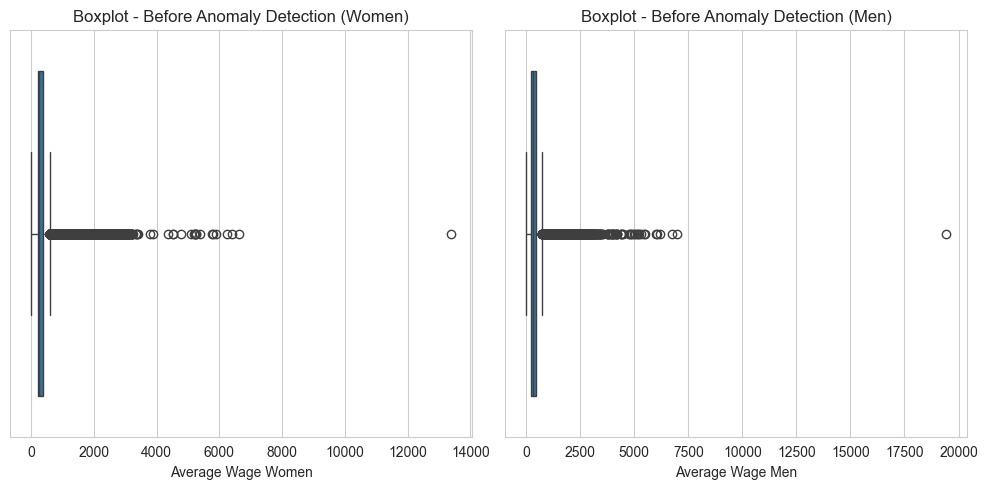

anomaly
 1    62814
-1     7797
Name: count, dtype: int64


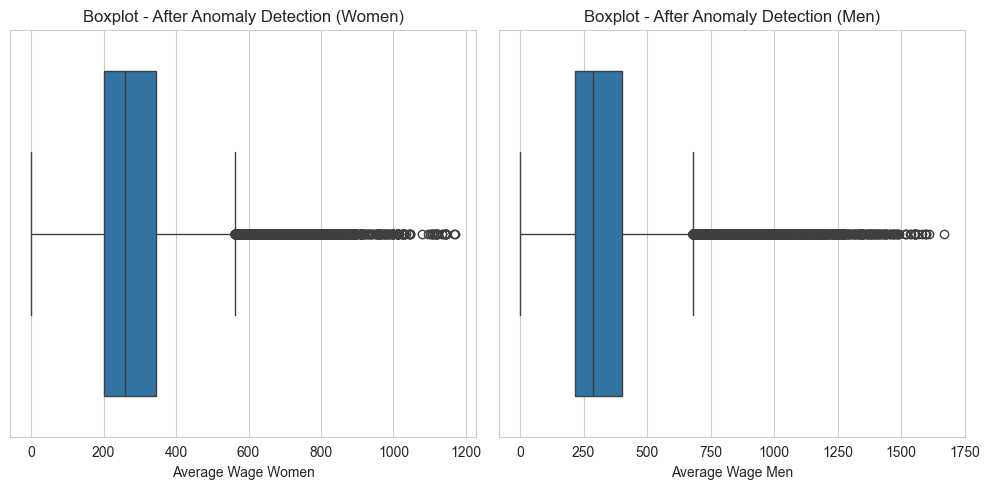

In [435]:
# before anomaly detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_translated, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - Before Anomaly Detection (Women)')

sns.boxplot(data=employment_translated, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - Before Anomaly Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_before_anomaly_detection.png')


# Selecting numeric columns, exclude non-relevant columns like IDs or indices
numeric_cols = employment_translated.select_dtypes(include=['int64', 'float64']).columns.tolist()
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the dataset
iso_forest.fit(employment_translated[numeric_cols])

# Predict anomalies, where -1 indicates an anomaly and 1 indicates a normal observation
employment_translated['anomaly'] = iso_forest.predict(employment_translated[numeric_cols])

anomaly_counts = employment_translated['anomaly'].value_counts()
print(anomaly_counts)

anomalies = employment_translated[employment_translated['anomaly'] == -1]
# print(anomalies)
employment_no_anomalies = employment_translated[employment_translated['anomaly'] != -1].copy()

# After outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_no_anomalies, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - After Anomaly Detection (Women)')

sns.boxplot(data=employment_no_anomalies, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - After Anomaly Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_after_anomaly_detection.png')


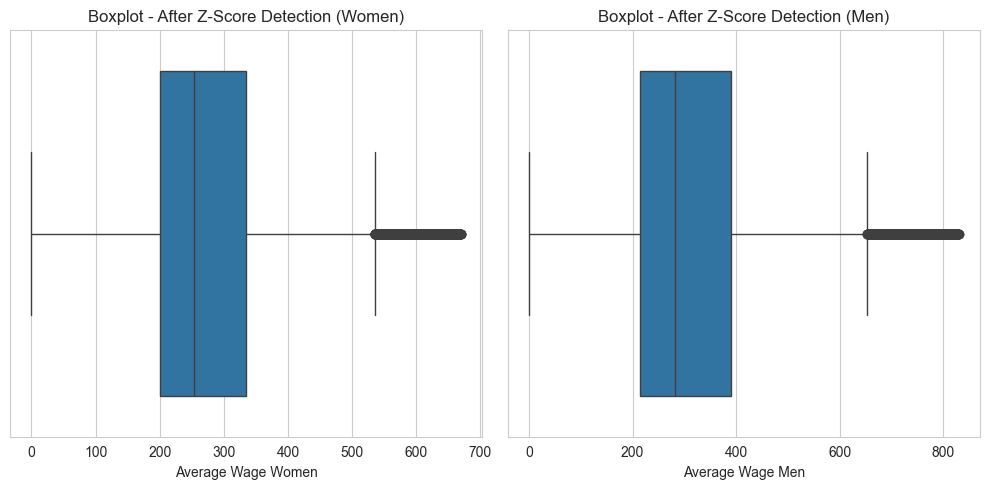

In [436]:
# Calculate the z-scores for "Average Wage Women" and "Average Wage Men" columns
z_scores = (employment_no_anomalies[['Average Wage Women', 'Average Wage Men']] - employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].mean()) / employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

outliers = z_scores.abs() > threshold

employment_no_outliers = employment_no_anomalies[~outliers.any(axis=1)]

# After outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_no_outliers, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - After Z-Score Detection (Women)')

sns.boxplot(data=employment_no_outliers, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - After Z-Score Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_after_zscore_detection.png')


In [437]:
employment_no_outliers.shape

(60938, 14)

In [438]:
skewness_men = employment_no_outliers['Average Wage Men'].skew()
skewness_women = employment_no_outliers['Average Wage Women'].skew()

print("Skewness for 'Average Wage Men':", skewness_men)
print("Skewness for 'Average Wage Women':", skewness_women)

Skewness for 'Average Wage Men': 1.074828187385358
Skewness for 'Average Wage Women': 1.0625024312727016


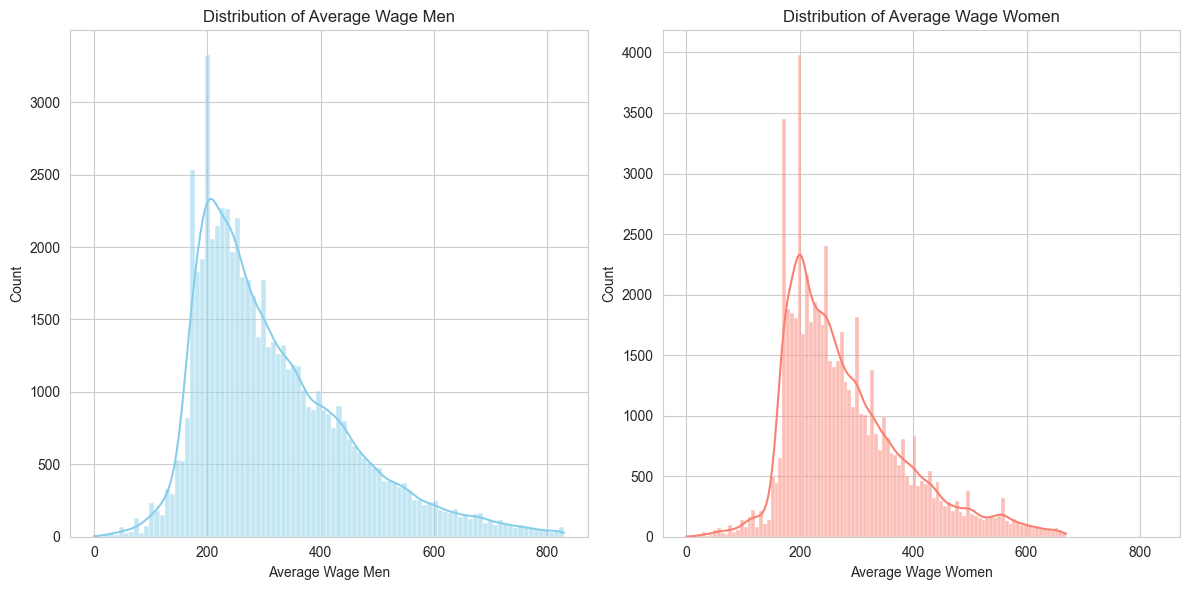

In [439]:
sns.set_style("whitegrid")

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.histplot(employment_no_outliers['Average Wage Men'], color="skyblue", ax=axes[0], kde=True)
axes[0].set_title('Distribution of Average Wage Men')

sns.histplot(employment_no_outliers['Average Wage Women'], color="salmon", ax=axes[1], kde=True)
axes[1].set_title('Distribution of Average Wage Women')

plt.tight_layout()
plt.show()

# export histogram
f.savefig('histogram_average_wage.png')

                     Number of Employees       Men     Women  \
Number of Employees             1.000000  0.973882  0.831988   
Men                             0.973882  1.000000  0.684290   
Women                           0.831988  0.684290  1.000000   
Average Wage Men                0.209619  0.201353  0.181220   
Average Wage Women              0.173580  0.172881  0.135045   

                     Average Wage Men  Average Wage Women  
Number of Employees          0.209619            0.173580  
Men                          0.201353            0.172881  
Women                        0.181220            0.135045  
Average Wage Men             1.000000            0.666774  
Average Wage Women           0.666774            1.000000  


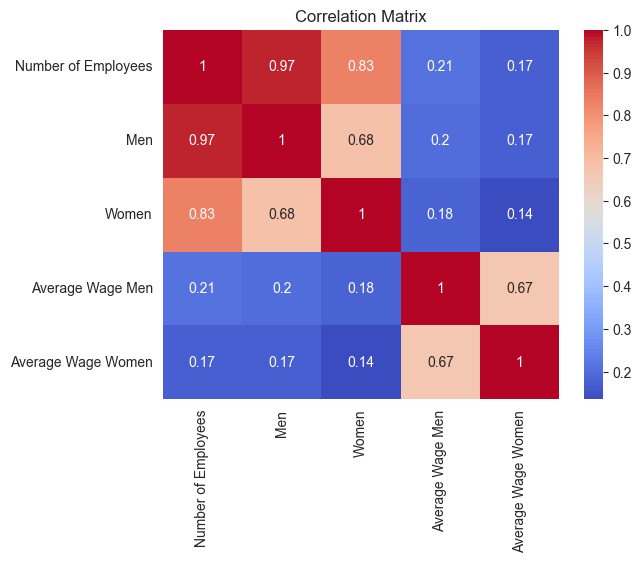

<Figure size 640x480 with 0 Axes>

In [444]:
import seaborn as sns
numerical_cols = ['Number of Employees', 'Men', 'Women', 'Average Wage Men', 'Average Wage Women']
correlation_matrix = employment_no_outliers[numerical_cols].corr()
print(correlation_matrix)

import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# export heatmap
plt.savefig('heatmap_correlation_matrix.png', bbox_inches='tight')


In [441]:
features = ['Sector Description', 'Registration Status', 'Municipality']
targets = ['Average Wage Men', 'Average Wage Women']

X = employment_no_outliers[features]
y = employment_no_outliers[targets]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Exporting to CSV
train_set.to_csv('dataset/training_set.csv', index=False)
test_set.to_csv('dataset/testing_set.csv', index=False)

In [445]:
train_set.shape

(42656, 5)

In [446]:
test_set.shape

(18282, 5)